В данной программе мы постараемся разобраться, почему функция points выдает среднее значение минимального и максимального положения обрезанного синуса.

In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import pandas as pand

Задаем функции, такие же как и в основной программе, только несколько облегченные.

In [2]:
def openData(nameXLS, name, folder_name, div): # Открывает эксельку и возвращает два np.array X, Y
    # Переходим в папку name
    os.chdir('C:\\Users\\Yaroslav\\YandexDisk\\Pr\\Py\\lab\\EmissiveProbe\\input\\' + folder_name + '\\' + str(name))
    # Считываем файл nameXLS в dataframe
    data = pand.read_excel(nameXLS)
    return np.array(data[data.columns[0]]) / 1000., np.array(data[data.columns[1]]) / (1000. * div)

def points(dataX, dataY, dY): 
    # Функция, которая возвращает среднее значение наибольшего и наименьшего значения обрезанного синуса.
    # Т.е. фактически положение плавающего потенциала и тока нагрева.
    mnY = min(dataY); mxY = max(dataY)
    number = []
    for i in np.linspace(mnY, mxY - dY, int(abs(mxY-mnY)/dY)):
        number.append(len(dataY[dataY < i + dY]))
    grad = np.gradient(number)
    return mnY + np.argmax(grad[:len(grad) / 2]) * dY, mnY + (len(grad) / 2 + np.argmax(grad[len(grad) / 2:])) * dY

def sampleRate(dataY): # Находит частоту дискретизации
    sortY = np.sort(dataY)
    return max(sortY[1:] - sortY[:-1])

def draw1(dataX, dataY, minY, maxY): # Рисуем данные с прямой, проходящей через срение значения
    plt.plot(dataX, dataY, '.b')
    plt.plot(np.linspace(min(dataX), max(dataX), 100), np.ones(100) * maxY, '-r')
    plt.plot(np.linspace(min(dataX), max(dataX), 100), np.ones(100) * minY, '-r')
    plt.ylabel('U, [V]')
    plt.xlabel('t, [s]')

Посмотрим как выглядят типичные первичные данные, полученные термозондом.

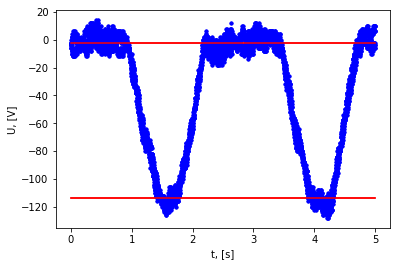

In [8]:
X, Y = openData('1.xls', 1, '8.06', 1)
minY, maxY = points(X, Y, sampleRate(Y))
draw1(X, Y, minY, maxY)
plt.show()

Здесь стоит отметить основной принцип, на котором работает поиск среднего, представленный ниже. В нижней и верхней области наибольшая концентрация точек, в отличии от средней неинформативной части, где количество точек практически не меняется. Выше уже было сказано, что полученное значение является средним, однако, более коректным было бы другое название: "наиболее вероятное значение". Это связано с тем, что мы находим место , где прирост точек является наибольшим, что практически аналогично тому, что в этой области больше всего точе, а как следствие и вероятность обнаружить там точку больше, нежели в другой области. Продемонстрируем сказанное.

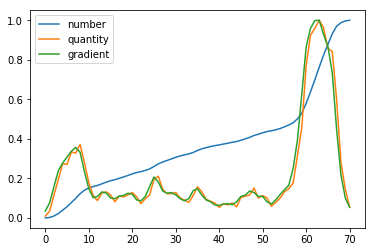

In [37]:
mnY = min(Y); mxY = max(Y); dY = sampleRate(Y)
number = []; quantity = []
for i in np.linspace(mnY, mxY - dY, int(abs(mxY-mnY)/dY)):
    number.append(len(Y[Y < i + dY]))
    quantity.append(len(Y[(i - dY < Y) & (Y < i + dY)]))
grad = np.gradient(number)
plt.plot(np.array(number) / float(max(number)), label = 'number')
plt.plot(np.array(quantity) / float(max(quantity)), label = 'quantity')
plt.plot(np.array(grad) / max(grad), label = 'gradient')
plt.legend()
plt.show()

Здесь на графике представленны три функции, превая number, это количество всех точек ниже некоторой горизонтальной прямой, которая движется вверх на графике первыичных данных при движении слева на право на данном графике. Функция quantity показывает число точек в горизонтальной полосе ширины равной частоте дискретизации. Последняя функция gradient, как не трудно догадаться иллюстрирует градиент функции number. От сюда же видно, что градиент является как-будто сглаженной версией quantity, сто было замечено ранеее.